# ESPnet2-ASR realtime demonstration

This notebook provides a demonstration of the realtime E2E-ASR using ESPnet2-ASR.

- ESPnet2-ASR: https://github.com/espnet/espnet/tree/master/egs2/TEMPLATE/asr1

Author: Jiatong Shi ([@ftshijt](https://github.com/ftshijt))

In [ ]:
# NOTE: pip shows imcompatible errors due to preinstalled libraries but you do not need to care
!pip install -q espnet==0.10.0
!pip install -q espnet_model_zoo

     |████████████████████████████████| 787 kB 5.4 MB/s 
     |████████████████████████████████| 174 kB 45.5 MB/s 
     |████████████████████████████████| 13.1 MB 27.3 MB/s 
     |████████████████████████████████| 1.8 MB 35.4 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 596 kB 43.4 MB/s 
     |████████████████████████████████| 212 kB 45.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5 MB 34.7 MB/s 
     |████████████████████████████████| 71 kB 7.6 MB/s 
     |████████████████████████████████| 1.0 MB 39.6 MB/s 
     |████████████████████████████████| 125 kB 43.9 MB/s 
     |████████████████████████████████| 749 kB 44.3 MB/s 
     |████████████████████████████████| 235 kB 43.8 MB/s 
     |████████████████████████████████| 1.3 MB 37.3 MB/s 
     |████████████████████████████████| 3.1 MB 35.3 MB/s 
     |██

## ASR model demo

### Model Selection

Please select model shown in [espnet_model_zoo](https://github.com/espnet/espnet_model_zoo/blob/master/espnet_model_zoo/table.csv)

In this demonstration, we will show English, Japanese, Spanish, Mandrain, Multilingual ASR model, respectively

In [ ]:
#@title Choose English ASR model { run: "auto" }

lang = 'en'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave' #@param ["Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave", "kamo-naoyuki/librispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_bpe5000_scheduler_confwarmup_steps40000_optim_conflr0.0025_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Japanese ASR model { run: "auto" }

lang = 'ja'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave' #@param ["Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Spanish ASR model { run: "auto" }

lang = 'es'
fs = 16000 #@param {type:"integer"}
tag = 'ftshijt/mls_asr_transformer_valid.acc.best' #@param ["ftshijt/mls_asr_transformer_valid.acc.best"] {type:"string"}

In [ ]:
#@title Choose Mandrain ASR model { run: "auto" }

lang = 'zh'
fs = 16000 #@param {type:"integer"}
tag = 'Emiru Tsunoo/aishell_asr_train_asr_streaming_transformer_raw_zh_char_sp_valid.acc.ave' #@param ["	Emiru Tsunoo/aishell_asr_train_asr_streaming_transformer_raw_zh_char_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Multilingual ASR model { run: "auto" }

lang = 'multilingual'
fs = 16000 #@param {type:"integer"}
tag = 'ftshijt/open_li52_asr_train_asr_raw_bpe7000_valid.acc.ave_10best' #@param ["	ftshijt/open_li52_asr_train_asr_raw_bpe7000_valid.acc.ave_10best"] {type:"string"}

### Model Setup

In [ ]:
import time
import torch
import string
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text


d = ModelDownloader()
# It may takes a while to download and build models
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cuda",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
    nbest=1
)

def text_normalizer(text):
    text = text.upper()
    return text.translate(str.maketrans('', '', string.punctuation))

https://zenodo.org/record/4304245/files/asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave.zip?download=1: 100%|██████████| 662M/662M [07:26<00:00, 1.56MB/s]


### Recognize our example recordings

Cloning into 'ESPNet_asr_egs'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 44 (delta 10), reused 39 (delta 9), pack-reused 0
Unpacking objects: 100% (44/44), done.


/usr/local/lib/python3.7/dist-packages/torch/functional.py:573: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  ../aten/src/ATen/native/SpectralOps.cpp:659.)
  normalized, onesided, return_complex)
/usr/local/lib/python3.7/dist-packages/espnet2/layers/stft.py:109: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  olens = (ilens - self.win_length) // self.hop_length + 1
/usr/local/lib/python3.7/dist-packages/espnet/nets/ctc_prefix_score.py:326: RuntimeWarning: invalid value encountered in logaddexp
  r_prev[:, 0], r_pre

Input Speech: ESPNet_asr_egs/en/1.wav


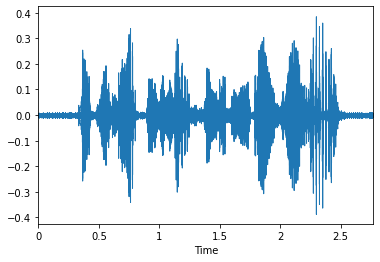

Reference text: IT WILL NOT BE SAFE FOR YOU TO STAY HERE NOW
ASR hypothesis: IT WILL NOT BE SAFE FOR YOU TO STAY HERE NOW
**************************************************
Input Speech: ESPNet_asr_egs/en/2.wav


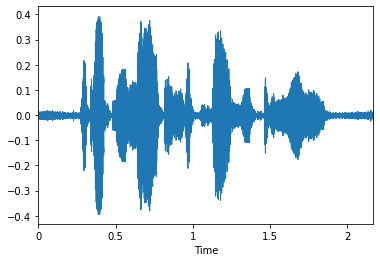

Reference text: IT WILL BE NO DISAPPOINTMENT TO ME
ASR hypothesis: IT WILL BE NO DISAPPOINTMENT TO ME
**************************************************
Input Speech: ESPNet_asr_egs/en/3.wav


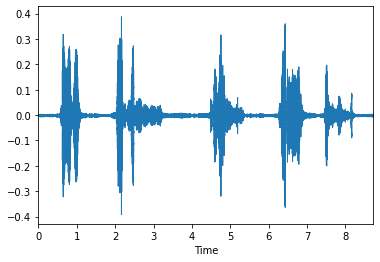

Reference text: HOWEVER THAT WAS OVER NOW THE TREE GONE THE STORY AT AN END
ASR hypothesis: HOWEVER THAT WAS OVER NOW THE TREE ON THE STORY HAD AN END
**************************************************
Input Speech: ESPNet_asr_egs/en/4.wav


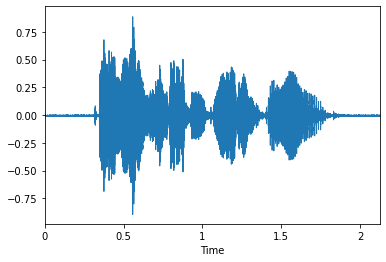

Reference text: ALL IS SAID WITHOUT A WORD
ASR hypothesis: ALL IS SAID WITHOUT A WORD
**************************************************
Input Speech: ESPNet_asr_egs/en/5.wav


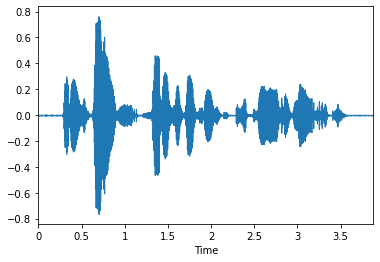

Reference text: IT IS THIS THAT IS OF INTEREST TO THEORY OF KNOWLEDGE
ASR hypothesis: IT IS THIS THAT IS OF INTEREST TO THEORY OF KNOWLEDGE
**************************************************


In [ ]:
!git clone https://github.com/ftshijt/ESPNet_asr_egs.git

import pandas as pd
import soundfile
import librosa.display
from IPython.display import display, Audio
import matplotlib.pyplot as plt


egs = pd.read_csv("ESPNet_asr_egs/egs.csv")
for index, row in egs.iterrows():
  if row["lang"] == lang or lang == "multilingual":
    speech, rate = soundfile.read("ESPNet_asr_egs/" + row["path"])
    assert fs == int(row["sr"])
    nbests = speech2text(speech)

    text, *_ = nbests[0]
    print(f"Input Speech: ESPNet_asr_egs/{row['path']}")
    # let us listen to samples
    display(Audio(speech, rate=rate))
    librosa.display.waveplot(speech, sr=rate)
    plt.show()
    print(f"Reference text: {text_normalizer(row['text'])}")
    print(f"ASR hypothesis: {text_normalizer(text)}")
    print("*" * 50)


### Recognize your own pre-recordings

1.   Upload your own pre-recorded recordings
2.   Recognize your voice with the ASR system

In [ ]:
from google.colab import files
from IPython.display import display, Audio
import soundfile
import librosa.display
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():
  speech, rate = soundfile.read(file_name)
  assert rate == fs, "mismatch in sampling rate"
  nbests = speech2text(speech)
  text, *_ = nbests[0]

  print(f"Input Speech: {file_name}")
  display(Audio(speech, rate=rate))
  librosa.display.waveplot(speech, sr=rate)
  plt.show()
  print(f"ASR hypothesis: {text_normalizer(text)}")
  print("*" * 50)

Saving rec.wav to rec (1).wav


AssertionError: ignored

### Recognize your own live-recordings



1.   Record your own voice
2.   Recognize your voice with the ASR system



Speak to your microphone 15 sec...


<IPython.core.display.Javascript object>

Done!


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


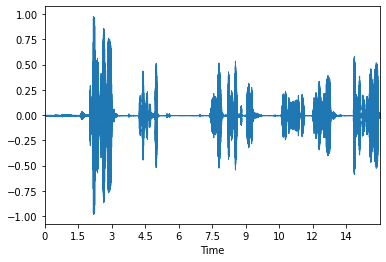

In [ ]:
# from https://gist.github.com/korakot/c21c3476c024ad6d56d5f48b0bca92be

from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

audio = 'audio.wav'
second = 15
print(f"Speak to your microphone {second} sec...")
record(second, audio)
print("Done!")


import librosa
import librosa.display
speech, rate = librosa.load(audio, sr=16000)
librosa.display.waveplot(speech, sr=rate)

import matplotlib.pyplot as plt
plt.show()

import pysndfile
pysndfile.sndio.write('audio_ds.wav', speech, rate=rate, format='wav', enc='pcm16')

from IPython.display import display, Audio
display(Audio(speech, rate=rate))

In [ ]:
nbests = speech2text(speech)
text, *_ = nbests[0]

print(f"ASR hypothesis: {text_normalizer(text)}")

/usr/local/lib/python3.7/dist-packages/espnet2/layers/stft.py:109: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  olens = (ilens - self.win_length) // self.hop_length + 1
/usr/local/lib/python3.7/dist-packages/espnet/nets/ctc_prefix_score.py:326: RuntimeWarning: invalid value encountered in logaddexp
  r_prev[:, 0], r_prev[:, 1]


ASR hypothesis: はいおはようございますお元気ですか今日は雨が降っていますけどどうぞよろしくお願いしますありがとうございます
